# **COVID-19 ANALYSIS**
## CS 6220 Final Project - Spring 2020
#### DATASET : https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset



## Setting up the environment

#### Importing the required libraries for the project

In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#### Using github to import the datase

In [0]:
!git clone https://github.com/priyanka-debnath/cs6220-sp20.git

fatal: destination path 'cs6220-sp20' already exists and is not an empty directory.


In [0]:
cd cs6220-sp20/datasets/

/content/cs6220-sp20/datasets


Lets take a look at the imported dataset

In [0]:
data = pd.read_csv("covid_19_data.csv")
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [0]:
print("Shape of the data\n\n",data.shape)
print("\n\n")
print("Is null?\n\n",data.isnull().sum())
print("\n\n")
print("Columnwise Datatype\n\n",data.dtypes)

Shape of the data

 (14491, 8)



Is null?

 SNo                   0
ObservationDate       0
Province/State     7105
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64



Columnwise Datatype

 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


### Data Cleaning and Preprocessing

In [0]:
# Removing irrelevant columns
data.drop(["SNo"],1,inplace=True)
# Changing to Datetime
data["ObservationDate"]=pd.to_datetime(data["ObservationDate"])
# Grouping the data according to the Observation Date
date_wise_data = data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

### Some Basic Inferences from the Data. These are the stastics for the entire world

In [0]:
print(" Countries affected : ",len(data["Country/Region"].unique()))
print("\n\n")
print(" Confirmed Cases : ",date_wise_data["Confirmed"].iloc[-1])
print(" Recovered Cases : ",date_wise_data["Recovered"].iloc[-1])
print(" Active Cases : ",(date_wise_data["Confirmed"].iloc[-1]-date_wise_data["Recovered"].iloc[-1]-date_wise_data["Deaths"].iloc[-1]))
print(" Closed Cases : ",date_wise_data["Recovered"].iloc[ -1]+date_wise_data["Deaths"].iloc[-1])
print("\n\n")
print(" Deaths : ",date_wise_data["Deaths"].iloc[-1])
print(" Deaths per Day : ",np.round(date_wise_data["Deaths"].iloc[-1]/date_wise_data.shape[0]))
print(" Deaths per Hour : ",np.round(date_wise_data["Deaths"].iloc[-1]/((date_wise_data.shape[0])*24)))
print("\n\n")
print(" Confirmed Cases per Day : ",np.round(date_wise_data["Confirmed"].iloc[-1]/date_wise_data.shape[0]))
print(" Confirmed Cases per Hour : ",np.round(date_wise_data["Confirmed"].iloc[-1]/((date_wise_data.shape[0])*24)))
print("\n\n")
print(" Recovered Cases per Day : ",np.round(date_wise_data["Recovered"].iloc[-1]/date_wise_data.shape[0]))
print(" Recovered Cases per Hour : ",np.round(date_wise_data["Recovered"].iloc[-1]/((date_wise_data.shape[0])*24)))


 Countries affected :  220



 Confirmed Cases :  1846680.0
 Recovered Cases :  421722.0
 Active Cases :  1310868.0
 Closed Cases :  535812.0



 Deaths :  114090.0
 Deaths per Day :  1391.0
 Deaths per Hour :  58.0



 Confirmed Cases per Day :  22520.0
 Confirmed Cases per Hour :  938.0



 Recovered Cases per Day :  5143.0
 Recovered Cases per Hour :  214.0


## Visualizations

### Distribution Plot for Active Cases over Date

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 <a list of 82 Text major ticklabel objects>)

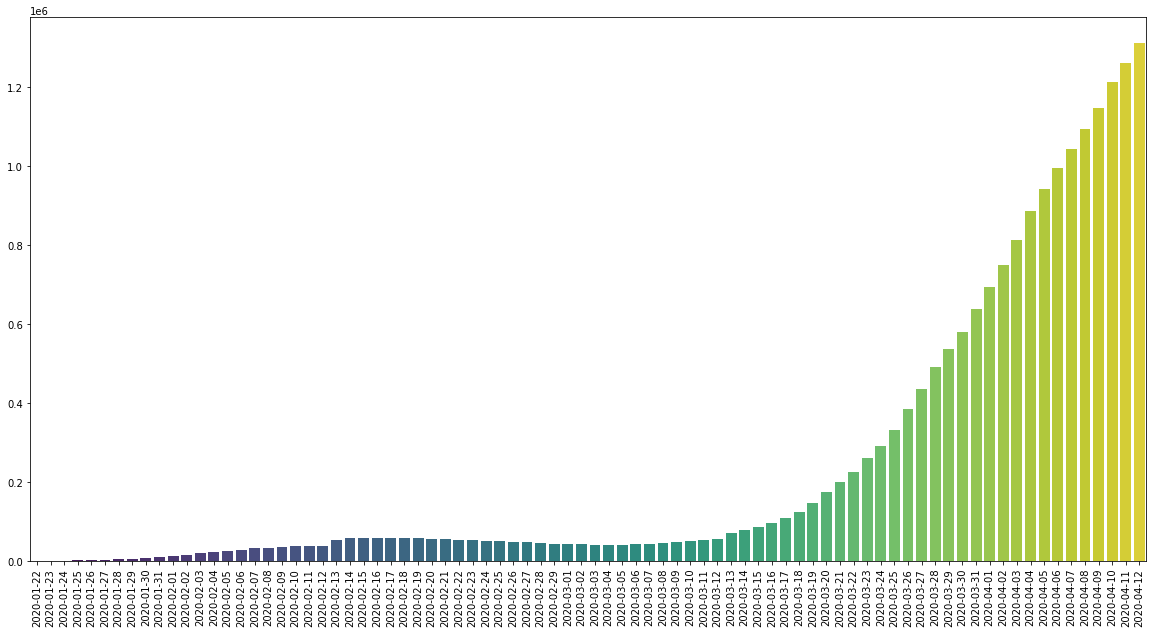

In [0]:
plt.figure(figsize=(20,10))
sns.barplot(x=date_wise_data.index.date, y=date_wise_data["Confirmed"]-date_wise_data["Recovered"]-date_wise_data["Deaths"], palette="viridis")
plt.xticks(rotation=90)

### Distribution Plot for Closed Cases over Date

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 <a list of 82 Text major ticklabel objects>)

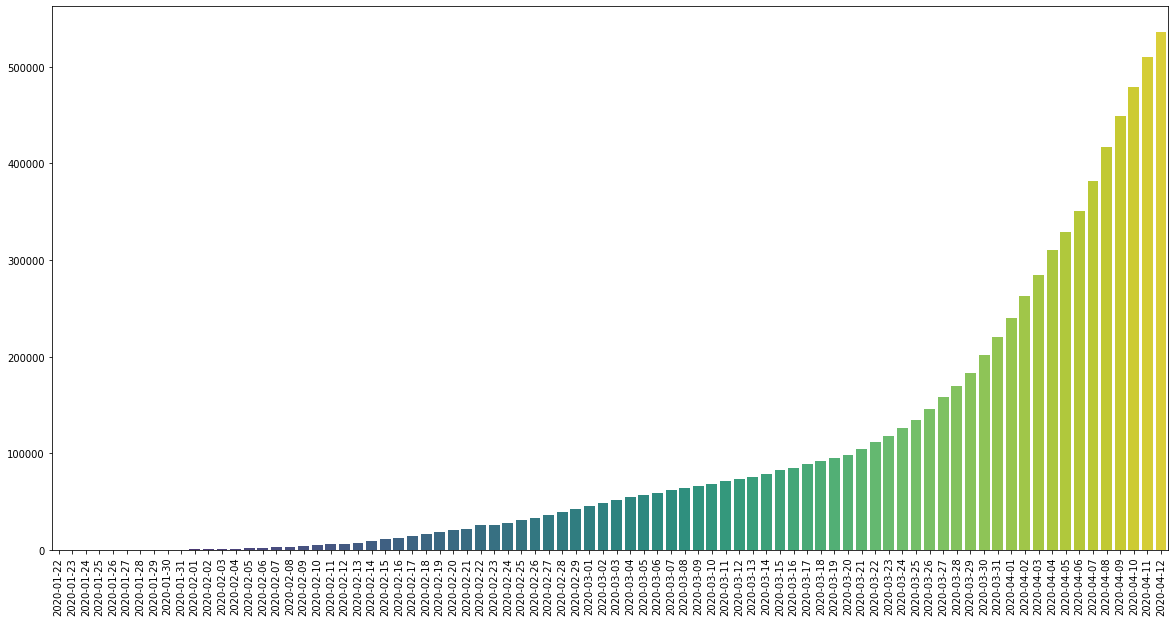

In [0]:
plt.figure(figsize=(20,10))
sns.barplot(x=date_wise_data.index.date, y=date_wise_data["Recovered"]+date_wise_data["Deaths"], palette="viridis")
plt.xticks(rotation=90)

### Week wise data Visualization

#### Increase in cases

Blue : Week wise confirmed cases
Orange : Week wise recovered cases
Green : Week wise deaths 





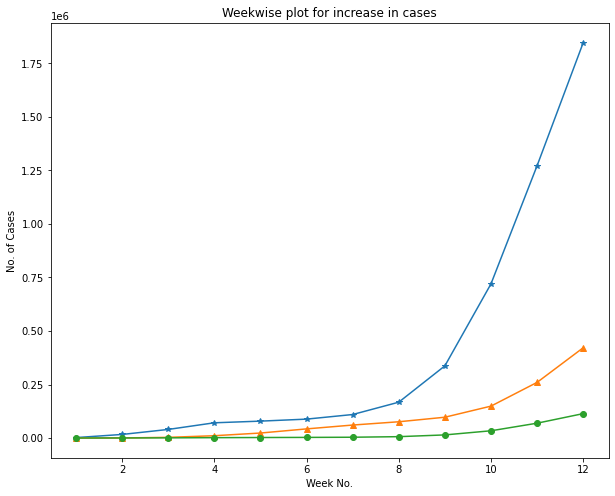

In [0]:
date_wise_data["WeekOfYear"]=date_wise_data.index.weekofyear

week_num=[]
week_wise_confirmed=[]
week_wise_recovered=[]
week_wise_deaths=[]
w_count=1
for i in list(date_wise_data["WeekOfYear"].unique()):
    week_wise_confirmed.append(date_wise_data[date_wise_data["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    week_wise_recovered.append(date_wise_data[date_wise_data["WeekOfYear"]==i]["Recovered"].iloc[-1])
    week_wise_deaths.append(date_wise_data[date_wise_data["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w_count)
    w_count=w_count+1

plt.figure(figsize=(10,8))
plt.plot(week_num, week_wise_confirmed, marker="*")
plt.plot(week_num, week_wise_recovered, marker="^")
plt.plot(week_num, week_wise_deaths, marker="o")
plt.ylabel("No. of Cases")
plt.xlabel("Week No.")
plt.title("Weekwise plot for increase in cases")
plt.xlabel

print("Blue : Week wise confirmed cases")
print("Orange : Week wise recovered cases")
print("Green : Week wise deaths ")
print("\n\n")

#### d

Text(0.5, 1.0, 'Weekwise increase in No. of Deaths')

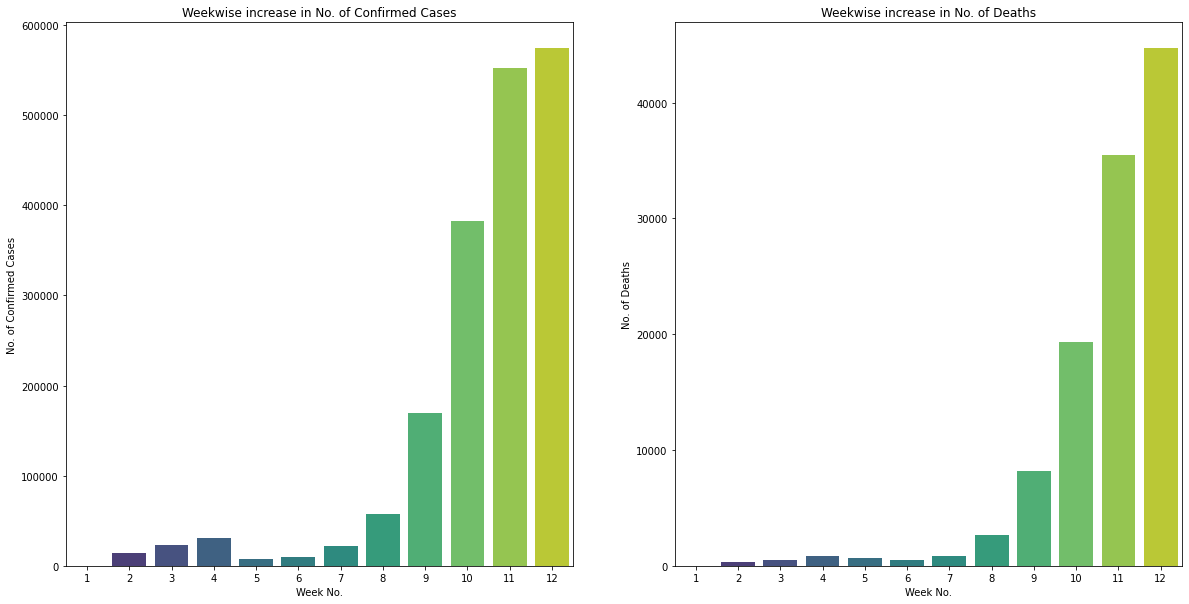

In [0]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,10))
sns.barplot(x=week_num,y=pd.Series(week_wise_confirmed).diff().fillna(0),ax=ax1, palette="viridis")
sns.barplot(x=week_num,y=pd.Series(week_wise_deaths).diff().fillna(0),ax=ax2, palette="viridis")
ax1.set_xlabel("Week No.")
ax2.set_xlabel("Week No.")
ax1.set_ylabel("No. of Confirmed Cases")
ax2.set_ylabel("No. of Deaths")
ax1.set_title("Weekwise increase in No. of Confirmed Cases")
ax2.set_title("Weekwise increase in No. of Deaths")

### Growth rate of Confirmed, Recovered and Death Cases

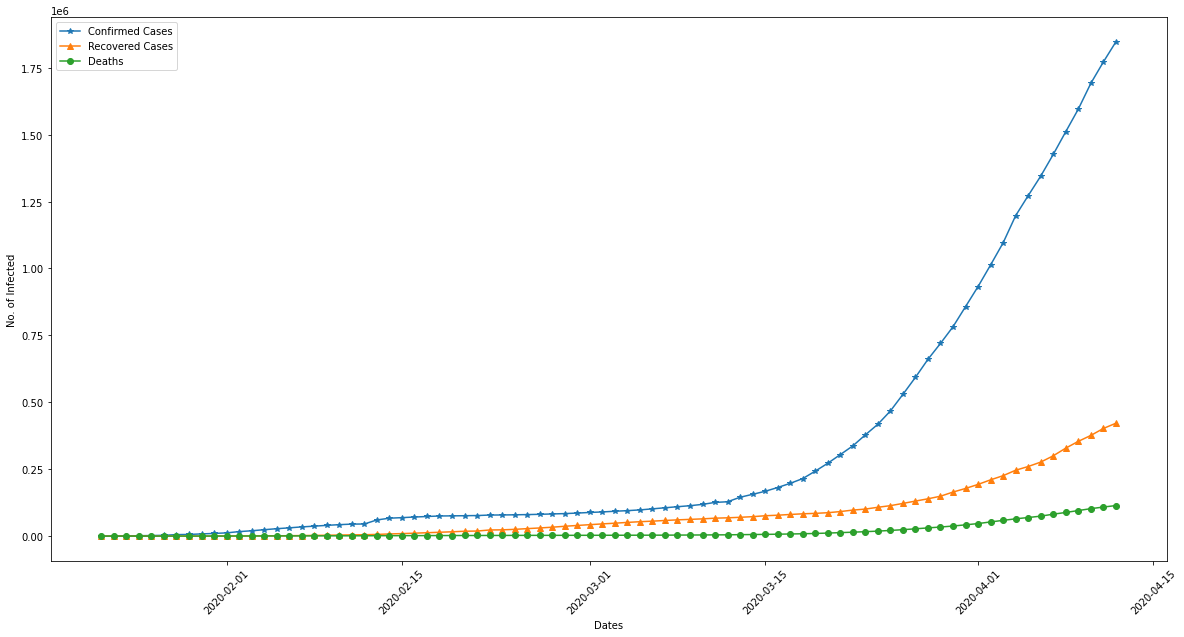

In [0]:
plt.figure(figsize=(20,10))
plt.plot(date_wise_data["Confirmed"],marker="*",label="Confirmed Cases")
plt.plot(date_wise_data["Recovered"],marker="^",label="Recovered Cases")
plt.plot(date_wise_data["Deaths"],marker="o",label="Deaths")
plt.ylabel("No. of Infected")
plt.xlabel("Dates")
plt.xticks(rotation=45)
plt.legend()

### Mortality and Recovery Rate analysis around the World

Average Mortality Rate 3.5772726848435554
Average Recovery Rate 24.91534485802812
Median Mortality Rate 3.4087832753216185
Median Recovery Rate 21.907308125517325


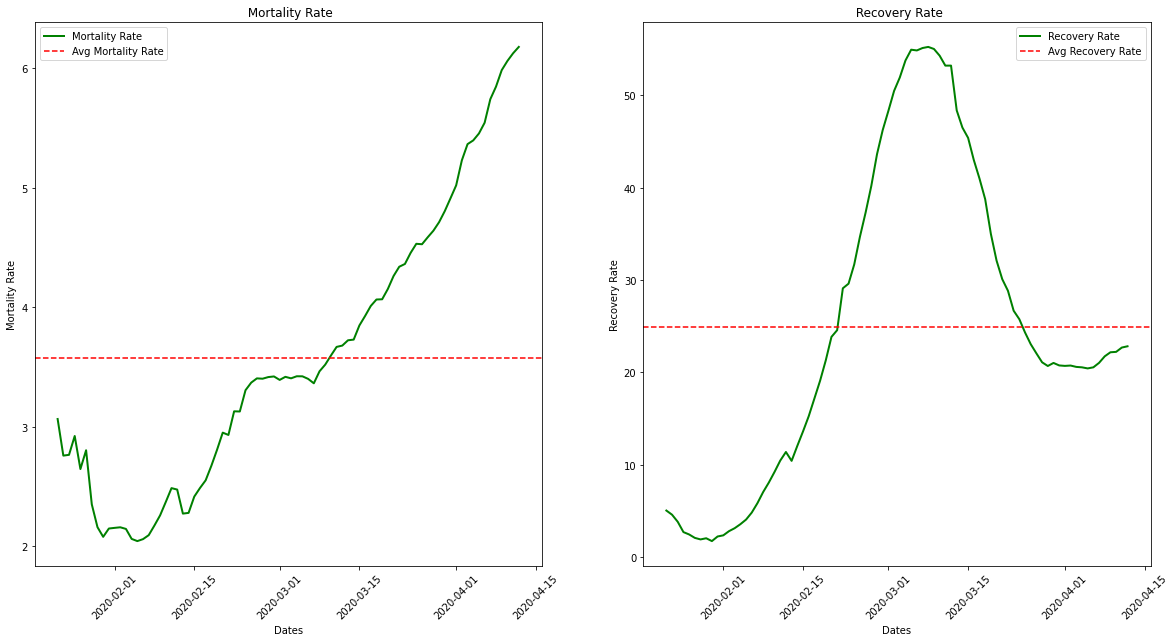

In [0]:
# Mortality Rate and Recovery Rate (Percentage)
date_wise_data["Mortality Rate"]=(date_wise_data["Deaths"]/date_wise_data["Confirmed"])*100
date_wise_data["Recovery Rate"]=(date_wise_data["Recovered"]/date_wise_data["Confirmed"])*100
date_wise_data["Active Cases"]=date_wise_data["Confirmed"]-date_wise_data["Recovered"]-date_wise_data["Deaths"]
date_wise_data["Closed Cases"]=date_wise_data["Recovered"]+date_wise_data["Deaths"]

#Plotting Mortality and Recovery Rate 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.plot(date_wise_data["Mortality Rate"],label='Mortality Rate',linewidth= 2, color="green")
ax1.axhline(date_wise_data["Mortality Rate"].mean(),linestyle='--',color='red',label="Avg Mortality Rate")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Dates")
ax1.set_title(" Mortality Rate")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax2.plot(date_wise_data["Recovery Rate"],label="Recovery Rate",linewidth=2,color="green")
ax2.axhline(date_wise_data["Recovery Rate"].mean(),linestyle='--',color='red',label="Avg Recovery Rate")
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Dates")
ax2.set_title(" Recovery Rate")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)

#Average
print("Average Mortality Rate",date_wise_data["Mortality Rate"].mean())
print("Average Recovery Rate",date_wise_data["Recovery Rate"].mean())
#Median
print("Median Mortality Rate",date_wise_data["Mortality Rate"].median())
print("Median Recovery Rate",date_wise_data["Recovery Rate"].median())

### Daily increase in different Types of Cases Worldwide

Average increase in no. of Confirmed Cases each day:  22514.0
Average increase in no. of Recovered Cases each day:  5143.0
Average increase in no. of Deaths each day:  1391.0


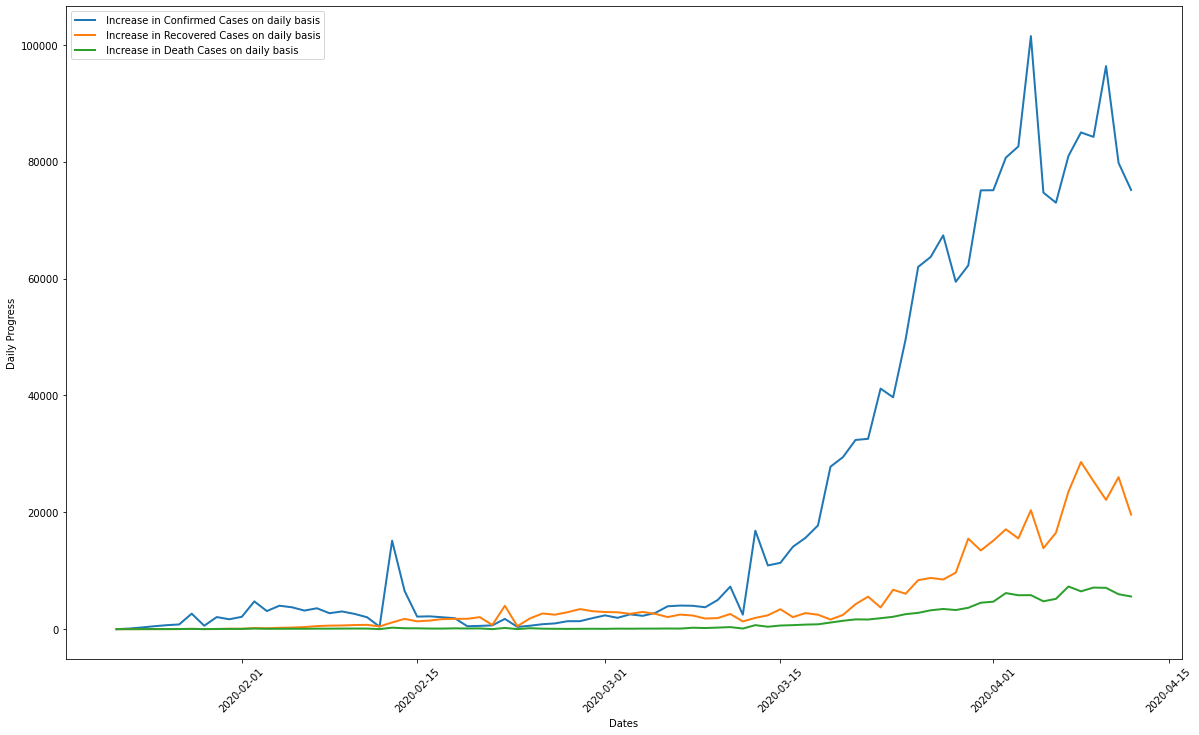

In [0]:
plt.figure(figsize=(20,12))
plt.plot(date_wise_data["Confirmed"].diff().fillna(0),label=" Increase in Confirmed Cases on daily basis",linewidth=2)
plt.plot(date_wise_data["Recovered"].diff().fillna(0),label=" Increase in Recovered Cases on daily basis",linewidth=2)
plt.plot(date_wise_data["Deaths"].diff().fillna(0),label=" Increase in Death Cases on daily basis",linewidth=2)
plt.xlabel("Dates")
plt.ylabel("Daily Progress")
plt.xticks(rotation=45)
plt.legend()

print("Average increase in no. of Confirmed Cases each day: ",np.round(date_wise_data["Confirmed"].diff().fillna(0).mean()))
print("Average increase in no. of Recovered Cases each day: ",np.round(date_wise_data["Recovered"].diff().fillna(0).mean()))
print("Average increase in no. of Deaths each day: ",np.round(date_wise_data["Deaths"].diff().fillna(0).mean()))

### Growth Factor for different Cases Worldwide

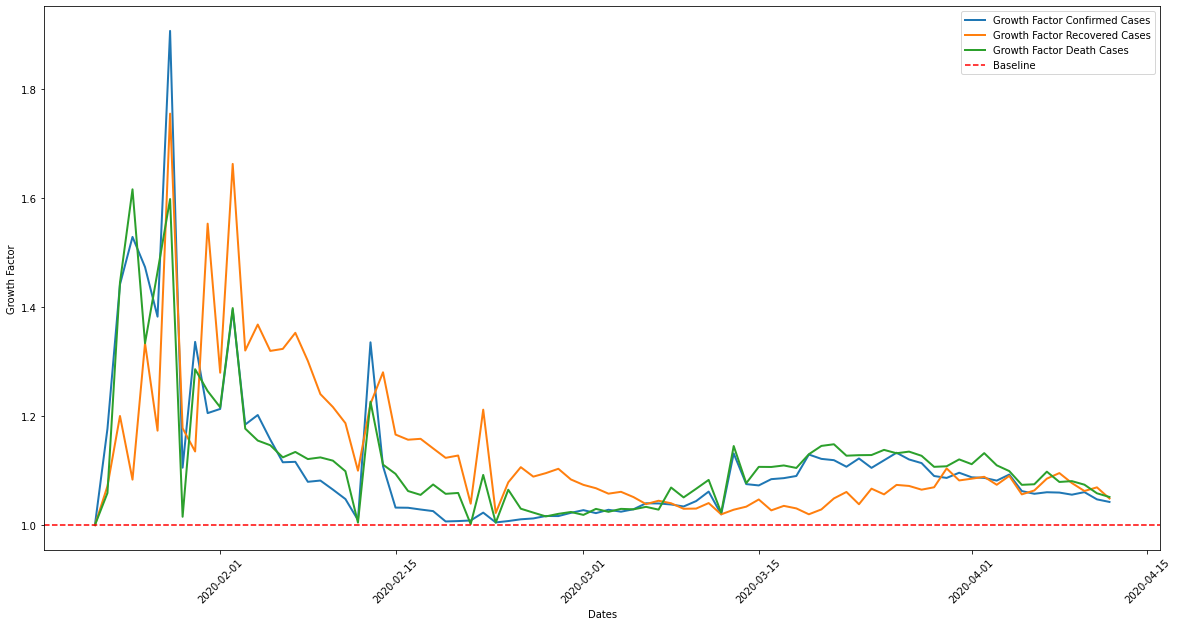

In [0]:
daily_increase_confirmed=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(date_wise_data.shape[0]-1):
    daily_increase_confirmed.append(((date_wise_data["Confirmed"].iloc[i+1]/date_wise_data["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((date_wise_data["Recovered"].iloc[i+1]/date_wise_data["Recovered"].iloc[i])))
    daily_increase_deaths.append(((date_wise_data["Deaths"].iloc[i+1]/date_wise_data["Deaths"].iloc[i])))
daily_increase_confirmed.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

plt.figure(figsize=(20,10))
plt.plot(date_wise_data.index,daily_increase_confirmed,label="Growth Factor Confirmed Cases",linewidth=2)
plt.plot(date_wise_data.index,daily_increase_recovered,label="Growth Factor Recovered Cases",linewidth=2)
plt.plot(date_wise_data.index,daily_increase_deaths,label="Growth Factor Death Cases",linewidth=2)
plt.xlabel("Dates")
plt.ylabel("Growth Factor")
plt.axhline(1,linestyle='--',color='red',label="Baseline")
plt.xticks(rotation=45)
plt.legend()

Here we see that the Growth Factor constantly above 1 is an clear indication of Exponential increase in all form of cases.

### Countrywise Analysis

Text(0.5, 1.0, 'Top 15 countries as per Number of Deaths')

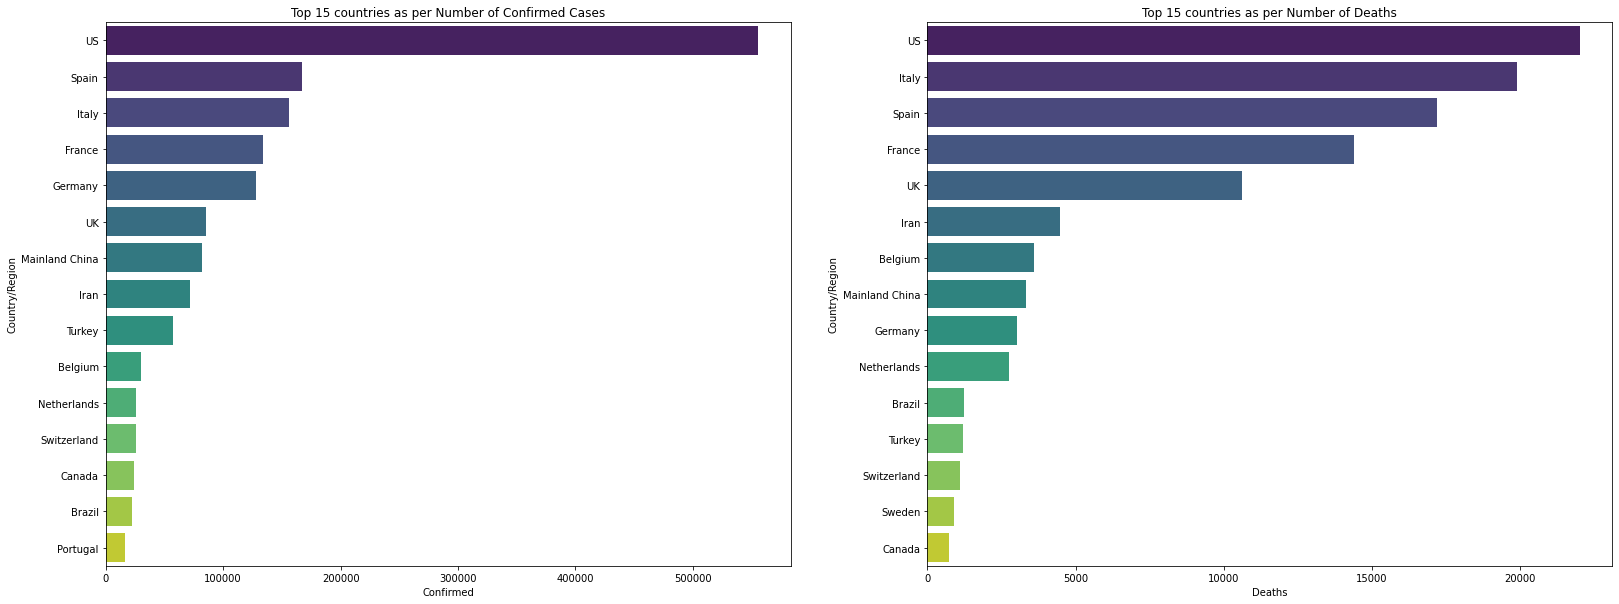

In [0]:
country_wise_data=data[data["ObservationDate"]==data["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
country_wise_data["Mortality"]=(country_wise_data["Deaths"]/country_wise_data["Confirmed"])*100
country_wise_data["Recovery"]=(country_wise_data["Recovered"]/country_wise_data["Confirmed"])*100

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(27,10))
top15_confirmed =country_wise_data.sort_values(["Confirmed"],ascending=False).head(15)
top15_deaths = country_wise_data.sort_values(["Deaths"],ascending=False).head(15)
#Top15 for confirmed
sns.barplot(x=top15_confirmed["Confirmed"],y=top15_confirmed.index,ax=ax1, palette="viridis")
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
#Top15 for deaths
sns.barplot(x=top15_deaths["Deaths"],y=top15_deaths.index,ax=ax2,palette="viridis")
ax2.set_title("Top 15 countries as per Number of Deaths")

### Top 15 Countries as per Mortatlity Rate and Recovery Rate with more than 500 Confirmed Cases



Text(0.5, 0, 'Recovery Rate')

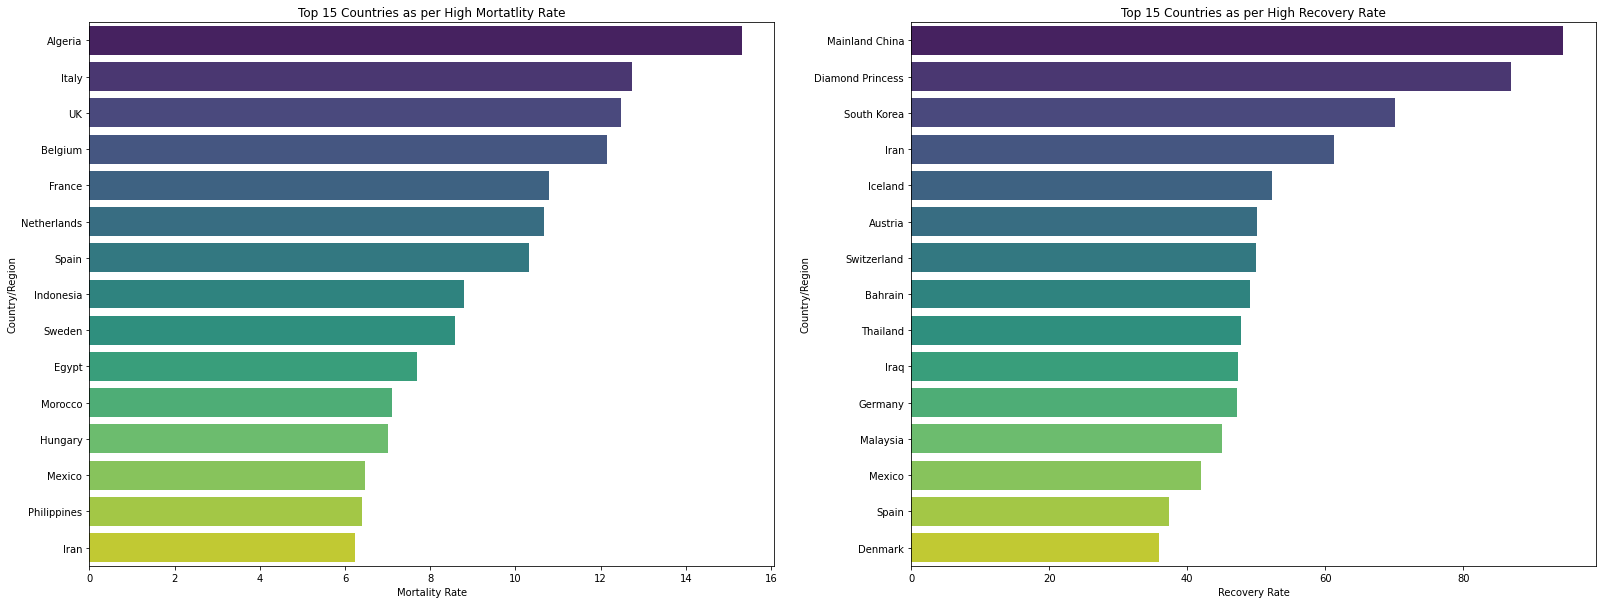

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(27,10))
country_wise_plot_mortal=country_wise_data[country_wise_data["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=country_wise_plot_mortal["Mortality"],y=country_wise_plot_mortal.index,ax=ax1, palette="viridis")
ax1.set_title("Top 15 Countries as per High Mortatlity Rate")
ax1.set_xlabel("Mortality Rate")
country_wise_plot_recover=country_wise_data[country_wise_data["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=country_wise_plot_recover["Recovery"],y=country_wise_plot_recover.index, ax=ax2, palette="viridis")
ax2.set_title("Top 15 Countries as per High Recovery Rate")
ax2.set_xlabel("Recovery Rate")

Text(0.5, 0, 'Recovery Rate')

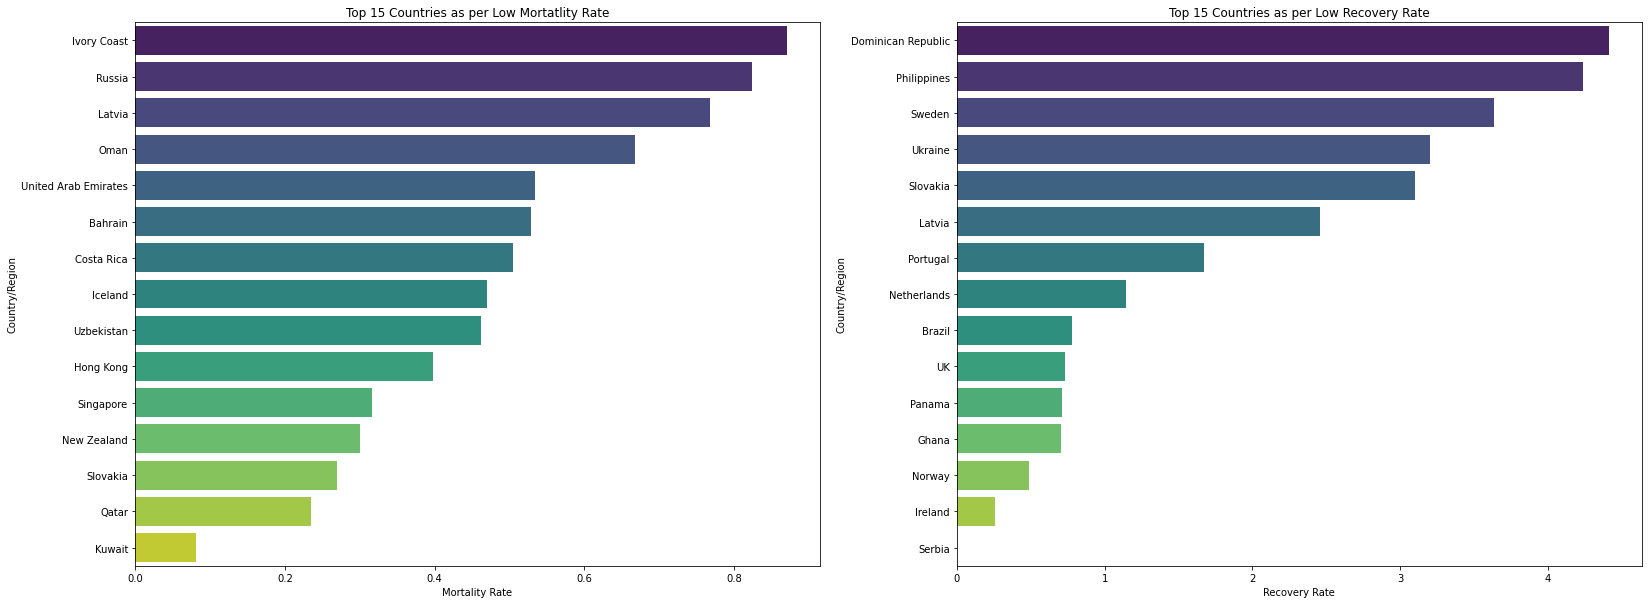

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(27,10))
country_wise_plot_mortal=country_wise_data[country_wise_data["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=country_wise_plot_mortal["Mortality"],y=country_wise_plot_mortal.index,ax=ax1, palette="viridis")
ax1.set_title("Top 15 Countries as per Low Mortatlity Rate")
ax1.set_xlabel("Mortality Rate")
country_wise_plot_recover=country_wise_data[country_wise_data["Confirmed"]>500].sort_values(["Recovery"],ascending=False).tail(15)
sns.barplot(x=country_wise_plot_recover["Recovery"],y=country_wise_plot_recover.index, ax=ax2, palette="viridis")
ax2.set_title("Top 15 Countries as per Low Recovery Rate")
ax2.set_xlabel("Recovery Rate")

### Top 15 Countries with Most Number of Active and Closed Cases

Text(0.5, 1.0, 'Top 15 Countries with Most No. of Closed Cases')

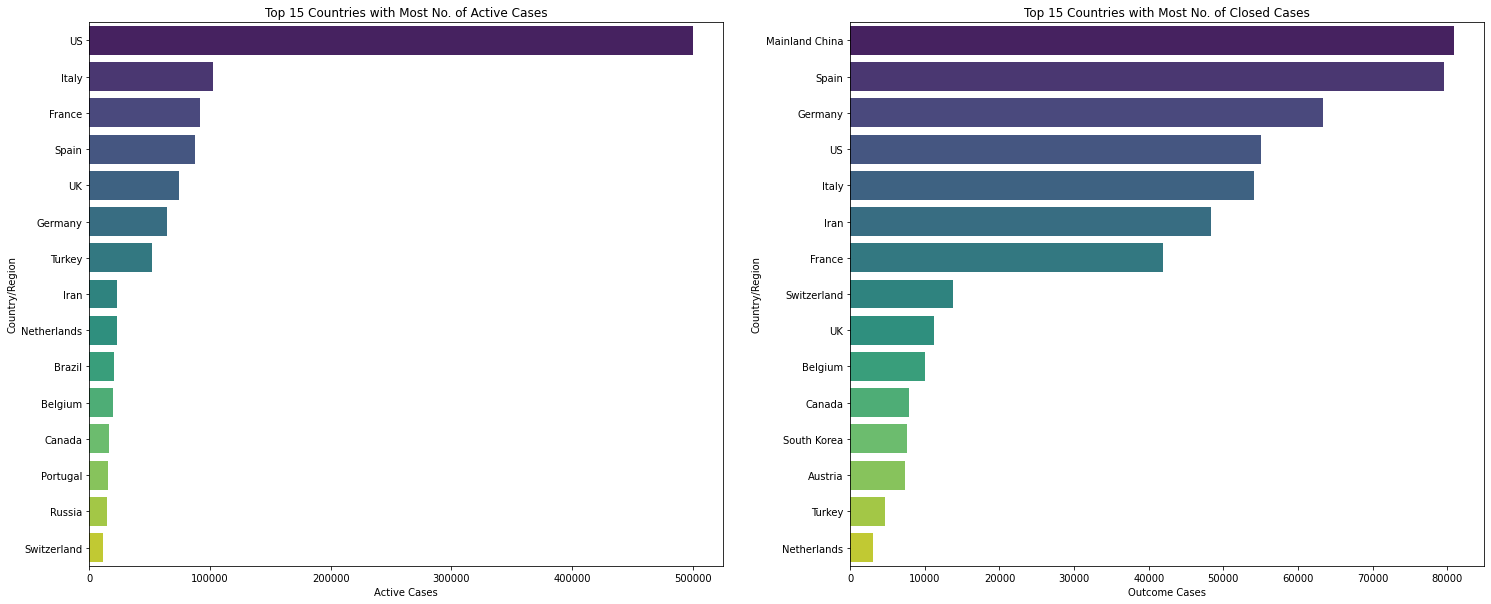

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,10))
country_wise_data["Active Cases"]=(country_wise_data["Confirmed"]-country_wise_data["Recovered"]-country_wise_data["Deaths"])
country_wise_data["Outcome Cases"]=(country_wise_data["Recovered"]+country_wise_data["Deaths"])
top15_active=country_wise_data.sort_values(["Active Cases"],ascending=False).head(15)
top15_outcome=country_wise_data.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top15_active["Active Cases"],y=top15_active.index,ax=ax1, palette="viridis")
sns.barplot(x=top15_outcome["Outcome Cases"],y=top15_outcome.index,ax=ax2, palette="viridis")
ax1.set_title("Top 15 Countries with Most No. of Active Cases")
ax2.set_title("Top 15 Countries with Most No. of Closed Cases")

### Comparison of China, Italy, US, Spain and Rest of the World

In [0]:
data_China = data[data["Country/Region"]=="Mainland China"]
data_Italy = data[data["Country/Region"]=="Italy"]
data_US = data[data["Country/Region"]=="US"]
data_Spain = data[data["Country/Region"]=="Spain"]
data_other_parts =data[(data["Country/Region"]!="Mainland China")&(data["Country/Region"]!="Italy")&(data["Country/Region"]!="US")&(data["Country/Region"]!="Spain")]

date_wise_china = data_China.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
date_wise_Italy = data_Italy.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
date_wise_US = data_US.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
date_wise_Spain = data_Spain.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
date_wise_otherparts = data_other_parts.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

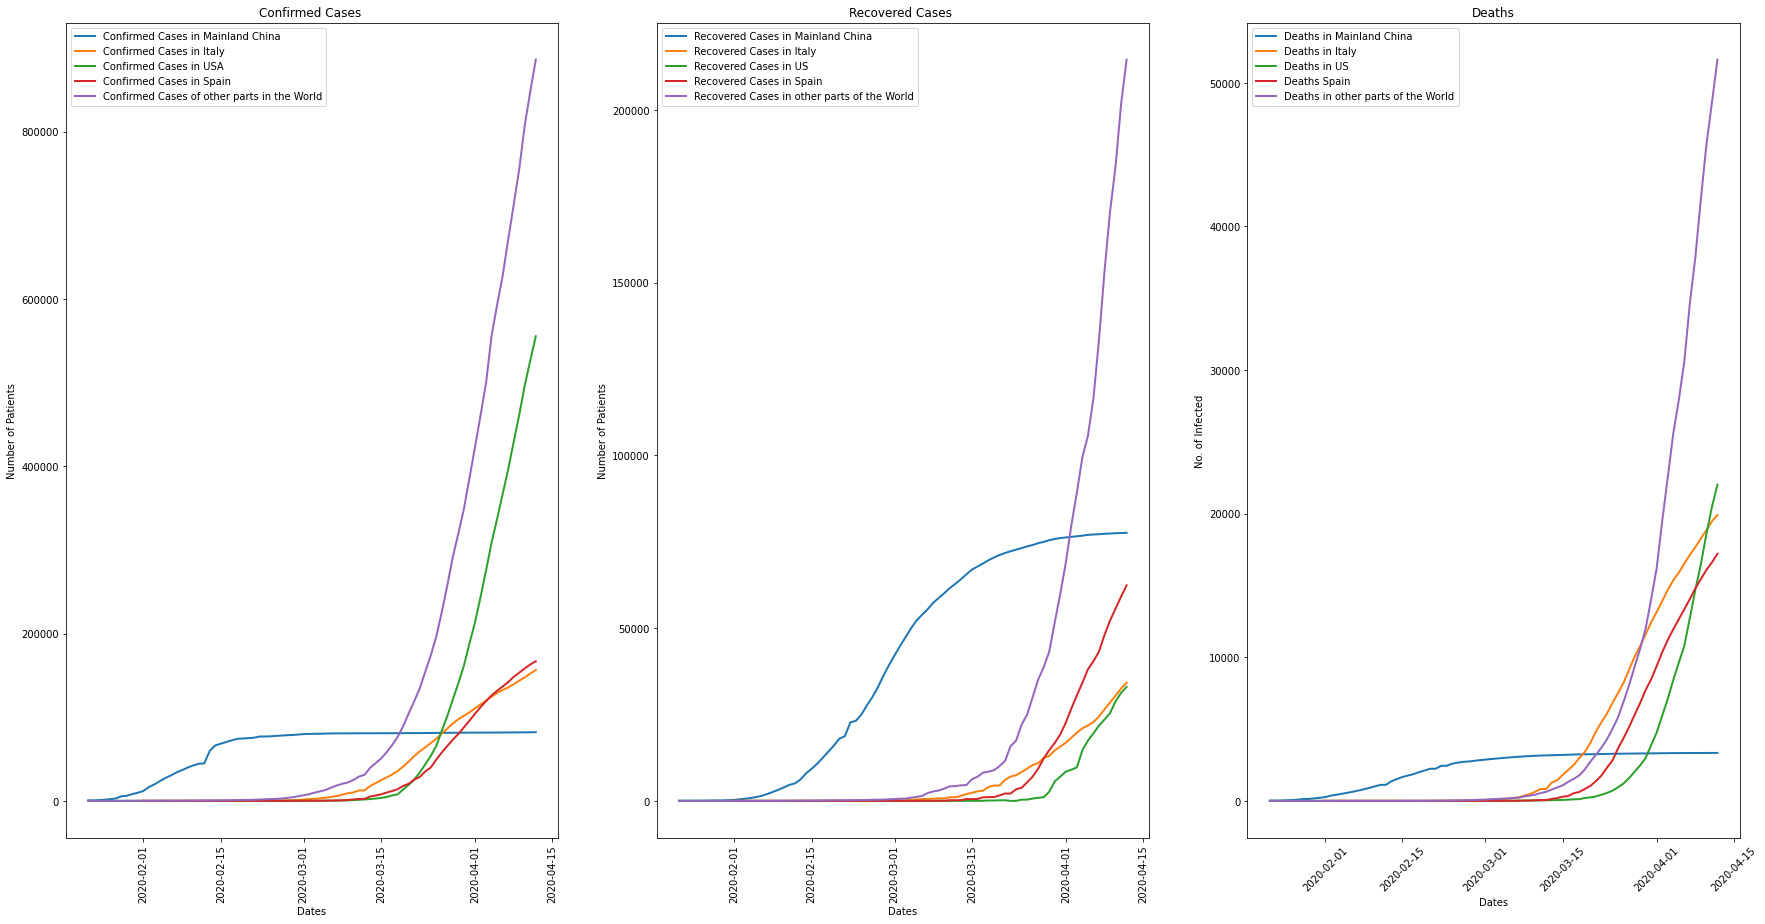

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(30,15))
ax1.plot(date_wise_china["Confirmed"],label="Confirmed Cases in Mainland China",linewidth=2)
ax1.plot(date_wise_Italy["Confirmed"],label="Confirmed Cases in Italy",linewidth=2)
ax1.plot(date_wise_US["Confirmed"],label="Confirmed Cases in USA",linewidth=2)
ax1.plot(date_wise_Spain["Confirmed"],label="Confirmed Cases in Spain",linewidth=2)
ax1.plot(date_wise_otherparts["Confirmed"],label="Confirmed Cases of other parts in the World",linewidth=2)
ax1.set_title("Confirmed Cases ")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Dates")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(date_wise_china["Recovered"],label="Recovered Cases in Mainland China",linewidth=2)
ax2.plot(date_wise_Italy["Recovered"],label="Recovered Cases in Italy",linewidth=2)
ax2.plot(date_wise_US["Recovered"],label="Recovered Cases in US",linewidth=2)
ax2.plot(date_wise_Spain["Recovered"],label="Recovered Cases in Spain",linewidth=2)
ax2.plot(date_wise_otherparts["Recovered"],label="Recovered Cases in other parts of the World",linewidth=2)
ax2.set_title("Recovered Cases ")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Dates")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax3.plot(date_wise_china["Deaths"],label='Deaths in Mainland China',linewidth=2)
ax3.plot(date_wise_Italy["Deaths"],label='Deaths in Italy',linewidth=2)
ax3.plot(date_wise_US["Deaths"],label='Deaths in US',linewidth=2)
ax3.plot(date_wise_Spain["Deaths"],label='Deaths Spain',linewidth=2)
ax3.plot(date_wise_otherparts["Deaths"],label="Deaths in other parts of the World",linewidth=2)
ax3.set_title("Deaths")
ax3.set_ylabel("No. of Infected")
ax3.set_xlabel("Dates")
ax3.legend()
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)

We see that China has been able to "flatten the curve" looking at their graphs of Confirmed and Death Cases. With staggering Recovery Rate.
US seems to have good control on Deaths, but number of people getting affected is going way out of hand.

In [0]:
date_wise_china["Mortality"]=(date_wise_china["Deaths"]/date_wise_china["Confirmed"])*100
date_wise_Italy["Mortality"]=(date_wise_Italy["Deaths"]/date_wise_Italy["Confirmed"])*100
date_wise_US["Mortality"]=(date_wise_US["Deaths"]/date_wise_US["Confirmed"])*100
date_wise_Spain["Mortality"]=(date_wise_Spain["Deaths"]/date_wise_Spain["Confirmed"])*100
date_wise_otherparts["Mortality"]=(date_wise_otherparts["Deaths"]/date_wise_otherparts["Confirmed"])*100

date_wise_china["Recovery"]=(date_wise_china["Recovered"]/date_wise_china["Confirmed"])*100
date_wise_Italy["Recovery"]=(date_wise_Italy["Recovered"]/date_wise_Italy["Confirmed"])*100
date_wise_US["Recovery"]=(date_wise_US["Recovered"]/date_wise_US["Confirmed"])*100
date_wise_Spain["Recovery"]=(date_wise_Spain["Recovered"]/date_wise_Spain["Confirmed"])*100
date_wise_otherparts["Recovery"]=(date_wise_otherparts["Recovered"]/date_wise_otherparts["Confirmed"])*100

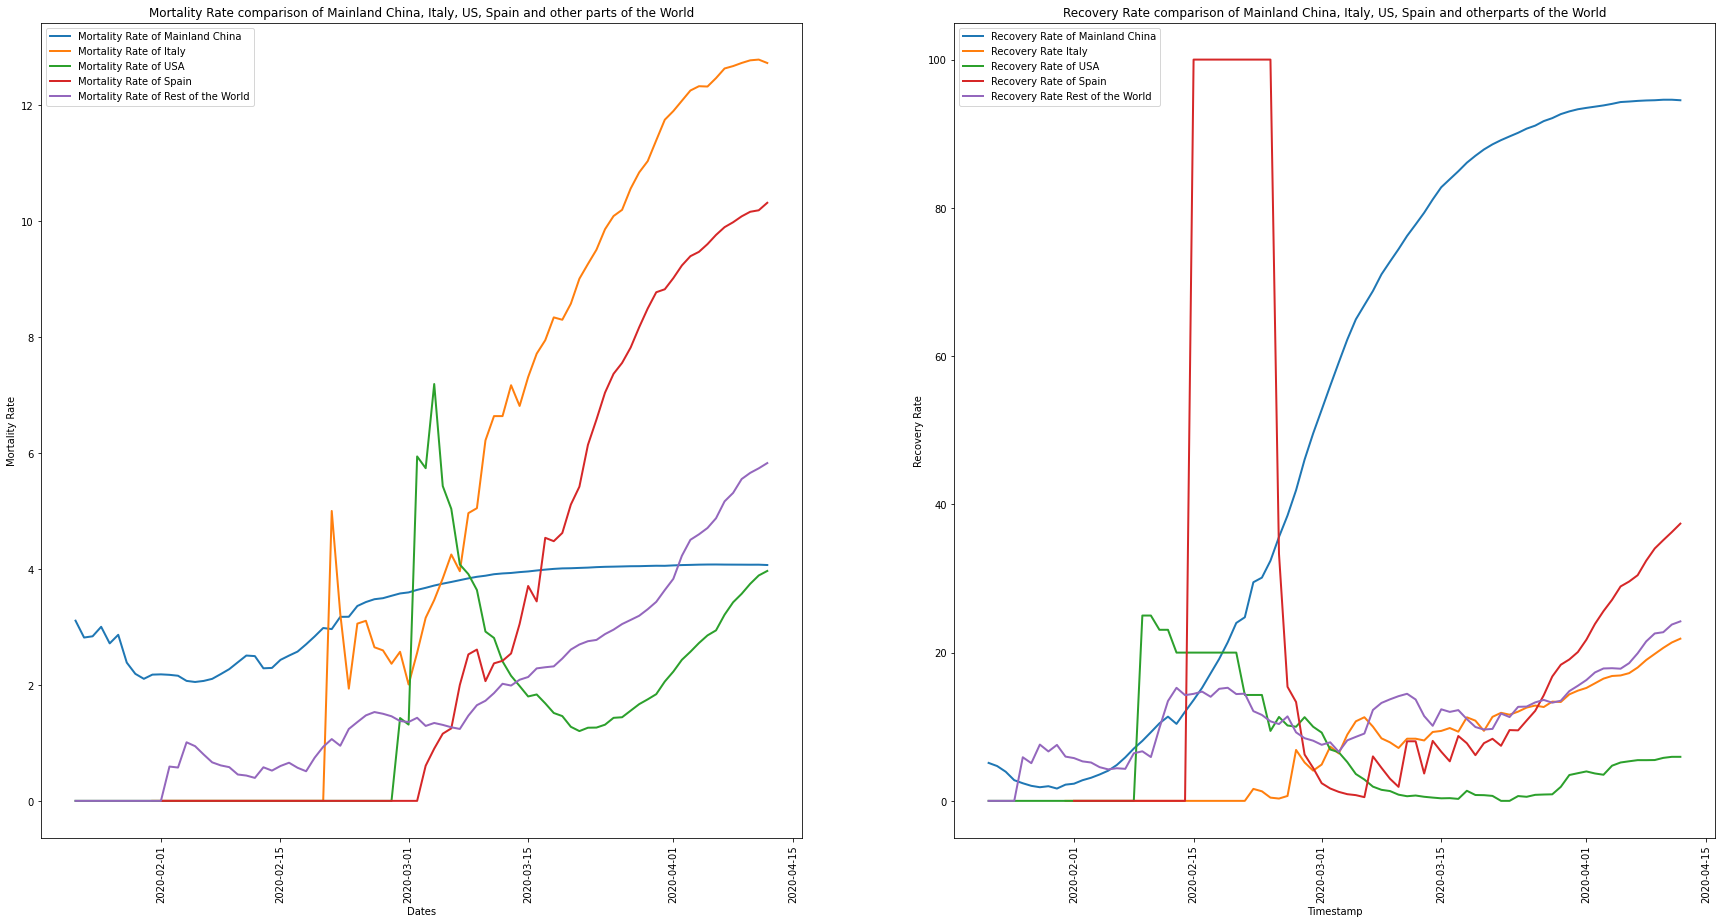

In [0]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(30,15))
ax1.plot(date_wise_china["Mortality"],label="Mortality Rate of Mainland China",linewidth=2)
ax1.plot(date_wise_Italy["Mortality"],label="Mortality Rate of Italy",linewidth=2)
ax1.plot(date_wise_US["Mortality"],label="Mortality Rate of USA",linewidth=2)
ax1.plot(date_wise_Spain["Mortality"],label="Mortality Rate of Spain",linewidth=2)
ax1.plot(date_wise_otherparts["Mortality"],label="Mortality Rate of Rest of the World",linewidth=2)
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Dates")
ax1.set_title("Mortality Rate comparison of Mainland China, Italy, US, Spain and other parts of the World")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(date_wise_china["Recovery"],label="Recovery Rate of Mainland China",linewidth=2)
ax2.plot(date_wise_Italy["Recovery"],label="Recovery Rate Italy",linewidth=2)
ax2.plot(date_wise_US["Recovery"],label="Recovery Rate of USA",linewidth=2)
ax2.plot(date_wise_Spain["Recovery"],label="Recovery Rate of Spain",linewidth=2)
ax2.plot(date_wise_otherparts["Recovery"],label="Recovery Rate Rest of the World",linewidth=2)
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Recovery Rate comparison of Mainland China, Italy, US, Spain and otherparts of the World")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

## Predictions using Machine Learning Models

### Linear Regression Model for Confirmed Cases Prediction

In [0]:
date_wise_data["Days Since"]=date_wise_data.index-date_wise_data.index[0]
date_wise_data["Days Since"]=date_wise_data["Days Since"].dt.days

train_ml=date_wise_data.iloc[:int(date_wise_data.shape[0]*0.90)]
valid_ml=date_wise_data.iloc[int(date_wise_data.shape[0]*0.90):]
model_scores=[]

lin_reg=LinearRegression(normalize=True)

lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  959965.3843261254


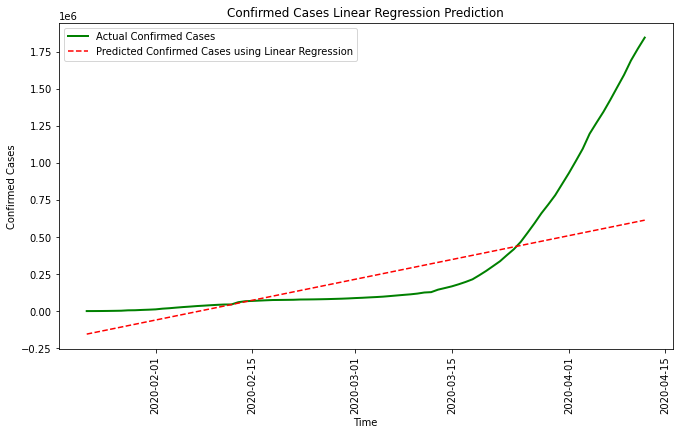

In [0]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(date_wise_data["Days Since"]).reshape(-1,1))
plt.plot(date_wise_data["Confirmed"],label="Actual Confirmed Cases", linewidth=2, color = "green")
plt.plot(date_wise_data.index,prediction_linreg, linestyle='--',label="Predicted Confirmed Cases using Linear Regression",color='red')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Linear Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

The Linear Regression Model seems to be really falling aprat. As it is clearly visible that the trend of Confirmed Cases in not at all Linear

### Support Vector Machine Regression Model for Confirmed Cases Prediction

In [0]:
#Intializing SVR Model and with hyperparameters for GridSearchCV
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

#Performing GridSearchCV to find the Best Estimator
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=6, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  161859.97552267514


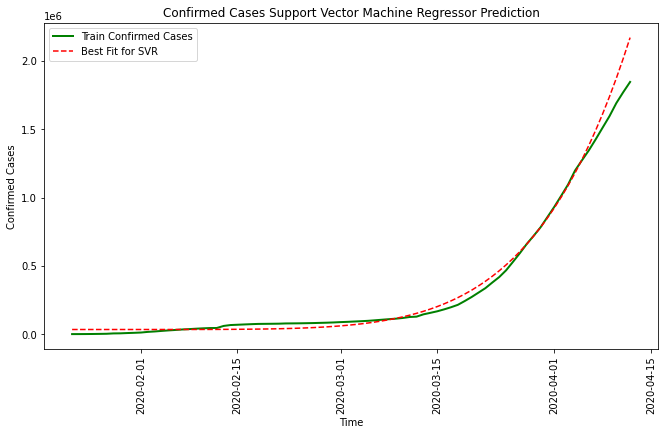

In [0]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(date_wise_data["Days Since"]).reshape(-1,1))
plt.plot(date_wise_data["Confirmed"],label="Train Confirmed Cases",linewidth=2, color ="green")
plt.plot(date_wise_data.index,prediction_svm, linestyle='--',label="Best Fit for SVR",color='red')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Support Vector Machine Regressor Prediction")
plt.xticks(rotation=90)
plt.legend()

### Comparison between the 2 models

In [0]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(date_wise_data.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(date_wise_data["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(date_wise_data["Days Since"].max()+i).reshape(-1,1))[0])

In [0]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=["Dates","Linear Regression Prediction","SVM Prediction"])
model_predictions.head()

,Dates,Linear Regression Prediction,SVM Prediction
0,2020-04-13,623747.629952,2334663.456037
1,2020-04-14,633243.319049,2508201.263523
2,2020-04-15,642739.008145,2692514.054271
3,2020-04-16,652234.697242,2888130.525870
4,2020-04-17,661730.386338,3095598.598038
